# Домашнее задание 3 - ЗБЧ и ЦПТ

__Оценки-баллы__: 
- 1: 0
- 2: 1
- 3: 2
- 4: 3
- 5: 4-5
- 6: 6-7
- 7: 8-9
- 8: 10-11
- 9: 12-13
- 10: 14-16

__DL (срок сдачи ДЗ)__: 22.12.2021 22:00. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw6_7_ivanov_i_i.ipynb

In [1]:
# Импорт библиотек для работы со статистикой
import numpy as np
import scipy.stats as sts

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

### Задание 1 [2] - Что такое ЗБЧ и ЦПТ?

#### Слабая форма ЗБЧ

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

#### Центральная предельная теорема

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{ \sigma \sqrt{n}} \overset{d}{\to} N(0,1)
$$

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

### Задание 2 [2] - для чего нужно распределение Хи-квадрат?

Случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Ниже график хи-квадрат.

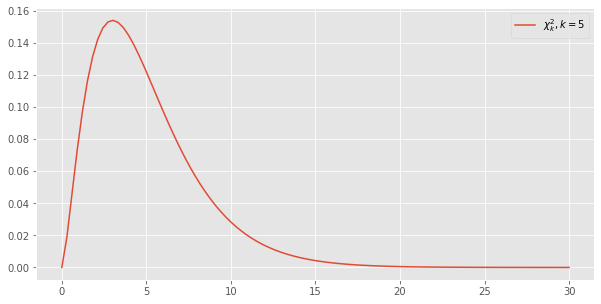

In [2]:
plt.figure(figsize=(10, 5))

k = 5
x = np.linspace(0,30,100)
rv = sts.chi2(k)
pdf = rv.pdf(x)
plt.plot(x, pdf, label="$\chi^2_k, k=%s$" % k)
plt.legend()

Дисперсия нормального распределения может описываться хи-квадрат. Ниже привиден пример.

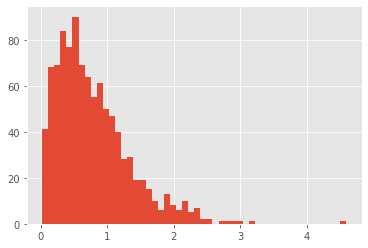

In [3]:
norm_rv = sts.norm(0, 1)
X = norm_rv.rvs(size = (1000, 5))

sigma = [x.var() for x in X]
sigma

plt.hist(sigma, 50);

Хи-квадрат позволяет проверить, насколько хорошо выборка соответствует характеристикам генеральной совокупности.

### Задание 3 [2] - нарисуйте распределение Фишера на графике

Случайная величина 

$$ Y = \frac{ \sqrt{\frac{\chi^2_k}{k}}}{\sqrt{\frac{\chi^2_m}{m}}}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$.

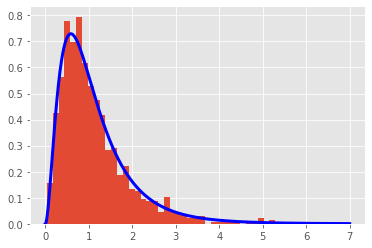

In [4]:
k,m = 6,15
size = 1000

x1 = (norm_rv.rvs(size = (k, size))**2).sum(axis=0)
x2 = (norm_rv.rvs(size = (m, size))**2).sum(axis=0)

y = (x1/k) / (x2/m)
x = np.linspace(0,7,1000)

plt.hist(y, bins=50, density = True);
plt.plot(x, sts.f.pdf(x, dfn=k, dfd=m), 'b', lw = 3);

### Задание 4 [5] - В этом задании нужно убедиться, что ЦПТ действительно работает

Создайте случайную величину из любого выбранного вами распределения, покажите, что ЦПТ работает для этого распределения

Возьмем экспоненциальное распределение.

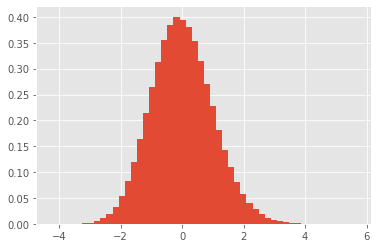

In [5]:
x = np.linspace(sts.expon.ppf(0.01), sts.expon.ppf(0.99), 100)
pdf = sts.expon.pdf(x)

n = 100
X = sts.expon.rvs(size = (n, 1_000_000))

y = ((np.sum(X, axis=0) - X.mean() * n) / (X.var() * np.sqrt(n)))

plt.hist(y, bins=50, density=True);

### Задание 5 [5] - В этом задании нужно убедиться, что ЗБЧ действительно работает

Приведите пример работы ЗБЧ

Рассмотрим на распределении Бернулли.

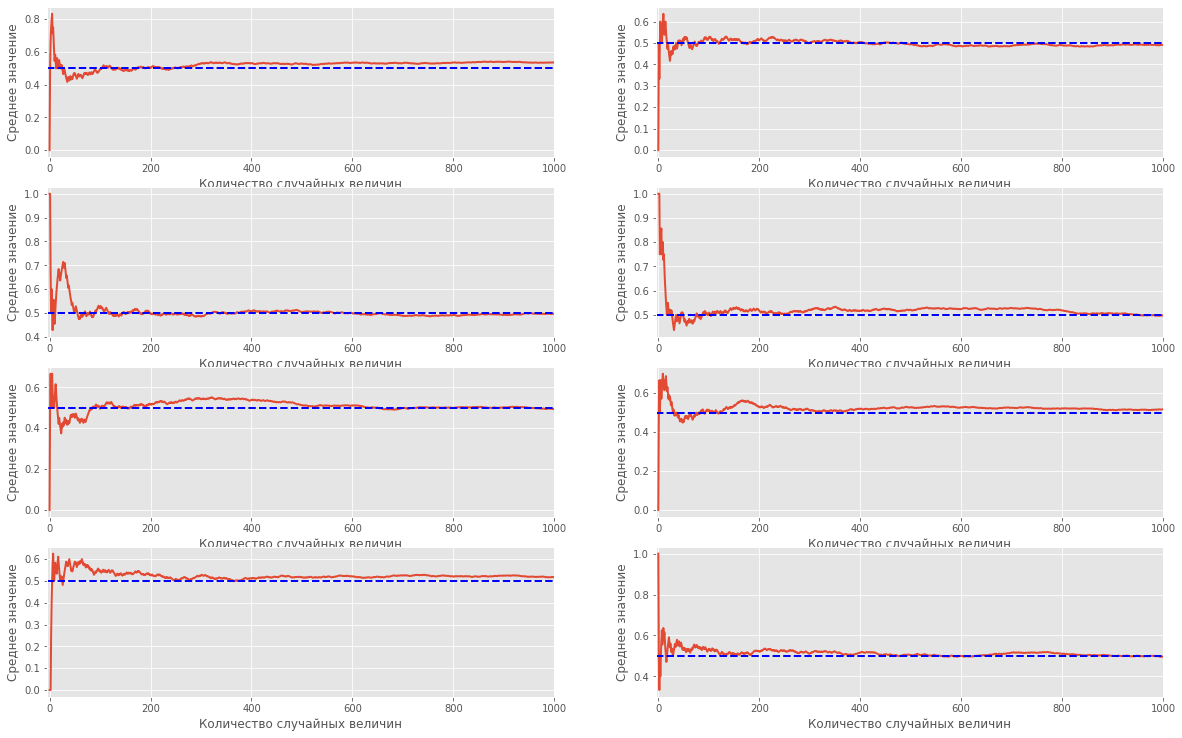

In [6]:
plt.figure(figsize=(20,16))

size = 1_000

for i in range(8):
    X = sts.bernoulli(p=0.5).rvs(size=size)
    cum_means = X.cumsum() / (np.arange(size) + 1)
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=2)
    plt.axhline(0.5, color='b', linestyle='dashed', linewidth=2)
    plt.xlim((-5, size))
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Среднее значение')

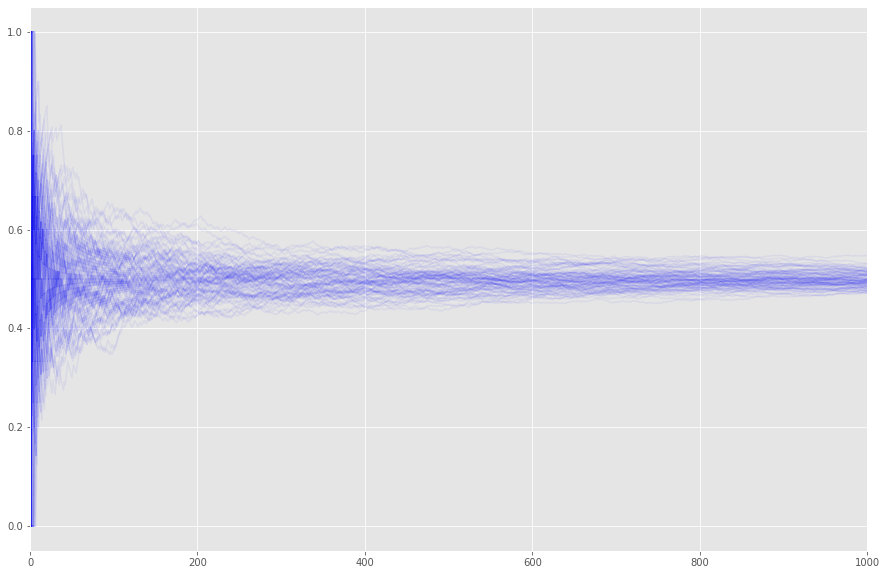

In [7]:
size = 1_000
n = 100

X = sts.bernoulli(p=0.5).rvs(size=(n, size))
cum_means = X.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 10))

for i in range(n):
    plt.plot(np.arange(size) + 1, cum_means[i], color='blue', alpha=0.05)

plt.xlim((0, size));